In [4]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

url = f"https://www.flipkart.com/search?q=washingmachines&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_15_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_15_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=washingmachines&requestId=a756b960-4d0f-41e7-bc9d-5694506079ee&as-searchtext=%20washingmachines"

requests.get(url)

In [ ]:
brand = []
Type = []
weight = []
load = []
color = []
speed = []
voltage = []
warranty = []
price = []
rating = []
for i in range(1,45):
    url = f"https://www.flipkart.com/search?q=washingmachines&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_15_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_15_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=washingmachines&requestId=a756b960-4d0f-41e7-bc9d-5694506079ee&as-searchtext=+washingmachines%3D1&page={i}"
    print(url)
    
    
    
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    
    content = soup.find_all('div',class_ = '_2kHMtA')
    
    for i in content:
        
        brands = i.find('div',class_='_4rR01T')
        reg = re.findall('^\w+',brands.text)
        if len(reg)== 1:
            brand.append(reg[0])
        else:
            brand.append(np.nan)
        
        #type
        reg = re.findall('Fully\s\w+|Semi\s\w+',brands.text)
        if len(reg) == 1:
            Type.append(reg[0])
        else:
            Type.append(np.nan)
            
        #weight
        reg = re.findall('\d+\skg|\d+\.\d+\skg',brands.text)
        if len(reg) == 1:
            weight.append(reg[0])   
        else:
            weight.append(np.nan)
        
        
        #load
        reg = re.findall('Top\s\w+|Front\s\w+|Top|Front',brands.text)
        if len(reg) == 1:
            load.append(reg[0])
        else:
            load.append(np.nan)
            
        #color
        reg = re.findall('\w+,\s\w+$|\w+$',brands.text)
        if len(reg) == 1:
            color.append(reg[0])
        else:
            color.append(np.nan)
            
            
        features =i.find('ul',class_ = '_1xgFaf')
        
        #speed
        reg = re.findall('(\d+ )rpm Max Speed',features.text)
        if len(reg) == 1:
            speed.append(reg[0])
        else:
            speed.append(np.nan)
            
        #voltage    
        reg = re.findall('(\d\s)Star',features.text)
        if len(reg) == 1:
            voltage.append(reg[0])
        else:
            voltage.append(np.nan)
            
        #warranty    
        reg = re.findall('\sRating(\d)',features.text)
        if len(reg) == 1:
            warranty.append(reg[0][0])
        else:
            warranty.append(np.nan)
        '''war=i.find('ul',class_='_1xgFaf')
        reg=re.findall('(.*) Year Warranty on Product',war.text)
        try:
            warranty.append(reg[0])
        except:
            warranty.append(np.nan)'''
            
        #price
        p=i.find('div',class_= '_30jeq3 _1_WHN1')
        if p:
            reg=re.findall("\d+,\d+",p.text)
        
            price.append(reg[0])
        else:
            price.append(np.nan)
            
        #rating
       
        rat = i.find('div',class_= '_3LWZlK')
        if rat:
            rating.append(rat.text)
        else:
            rating.append(np.nan)
        
    

In [5]:
 df = pd.DataFrame({"Brand_Name":brand,
                                 "Machine_Type":Type,
                                 "Access_location":load,
                                 "Capacity":weight,
                                 "Energy_star":voltage,
                                 "Spin_Speed":speed,
                                 "Color":color,
                                 "Warranty":warranty,
                                 "Price":price,
                                 "Rating":rating})

NameError: name 'brand' is not defined

In [6]:
df.to_csv('WASHING_MACHINE_DATA1.csv')

NameError: name 'df' is not defined

In [7]:
df = pd.read_csv(r"C:\Users\ACER\ OUR PROJECT\WASHING_MACHINE_DATA1.csv")

In [8]:
df

,Unnamed: 0,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,0,SAMSUNG,Semi Automatic,Top Load,7.5 kg,5.0,1300.0,"Blue, Grey",2.0,"11,990",4.4
1,1,SAMSUNG,Semi Automatic,Top Load,9.5 kg,5.0,1300.0,"Black, Grey",2.0,"15,990",4.4
2,2,Thomson,Semi Automatic,Top Load,7.5 kg,5.0,NaN,"Black, Grey",2.0,"7,690",4.0
3,3,LG,Semi Automatic,Top Load,7 kg,5.0,1350.0,NaN,2.0,"11,490",4.4
4,4,Haier,Fully Automatic,Top Load,6.5 kg,5.0,800.0,"Brown, Grey",2.0,"12,490",4.3
...,...,...,...,...,...,...,...,...,...,...,...
979,979,Godrej,Fully Automatic,Top Load,6.2 kg,NaN,700.0,Grey,NaN,"16,699",4.2
980,980,LG,NaN,NaN,6.5 kg,5.0,1000.0,NaN,NaN,"24,990",4.4
981,981,SAMSUNG,Semi Automatic,Top Load,9.5 kg,5.0,1300.0,"Black, Grey",2.0,"15,990",4.4
982,982,Whirlpool,Semi Automatic,Top Load,7.2 kg,NaN,1450.0,"Red, White",NaN,"13,700",4.4


# Data Cleaning 

In [9]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [10]:
df

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5 kg,5.0,1300.0,"Blue, Grey",2.0,"11,990",4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5 kg,5.0,1300.0,"Black, Grey",2.0,"15,990",4.4
2,Thomson,Semi Automatic,Top Load,7.5 kg,5.0,NaN,"Black, Grey",2.0,"7,690",4.0
3,LG,Semi Automatic,Top Load,7 kg,5.0,1350.0,NaN,2.0,"11,490",4.4
4,Haier,Fully Automatic,Top Load,6.5 kg,5.0,800.0,"Brown, Grey",2.0,"12,490",4.3
...,...,...,...,...,...,...,...,...,...,...
979,Godrej,Fully Automatic,Top Load,6.2 kg,NaN,700.0,Grey,NaN,"16,699",4.2
980,LG,NaN,NaN,6.5 kg,5.0,1000.0,NaN,NaN,"24,990",4.4
981,SAMSUNG,Semi Automatic,Top Load,9.5 kg,5.0,1300.0,"Black, Grey",2.0,"15,990",4.4
982,Whirlpool,Semi Automatic,Top Load,7.2 kg,NaN,1450.0,"Red, White",NaN,"13,700",4.4


In [11]:
df['Machine_Type'].unique()

array(['Semi Automatic', 'Fully Automatic', nan, 'Fully Automa',
       'Semi Automati', 'Fully Au', 'Fully Auto', 'Fully A', 'Semi Au',
       'Fully Aut', 'Semi Auto', 'Semi Automa'], dtype=object)

In [12]:
def wash(x):                                    # fintion to replace 
    if 'Semi' in str(x):                     
        return 'Semi Automatic'
    elif  'Fully' in str(x):
        return 'Fully Automatic'
    else:
        return x
    

In [13]:
df['Machine_Type'] = df['Machine_Type'].apply(wash)    

In [14]:
df['Machine_Type'].unique()

array(['Semi Automatic', 'Fully Automatic', nan], dtype=object)

In [15]:
df['Access_location'].unique()

array(['Top Load', 'Front Load', nan, 'Top', 'Top Loa', 'Top L',
       'Front L', 'Top load', 'Front Lo', 'Front'], dtype=object)

In [16]:
def loction(x):                             # funtion to  replace 
    if 'Top' in str(x):
        return 'Top Load'
    elif 'Front' in str(x):
        return 'Front Load'
    else:
        return x

In [17]:
df['Access_location'].unique()

array(['Top Load', 'Front Load', nan, 'Top', 'Top Loa', 'Top L',
       'Front L', 'Top load', 'Front Lo', 'Front'], dtype=object)

In [18]:
df['Access_location'] = df['Access_location'].apply(loction)

In [19]:
df['Access_location'].unique()

array(['Top Load', 'Front Load', nan], dtype=object)

In [20]:
df.head()

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5 kg,5.0,1300.0,"Blue, Grey",2.0,"11,990",4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5 kg,5.0,1300.0,"Black, Grey",2.0,"15,990",4.4
2,Thomson,Semi Automatic,Top Load,7.5 kg,5.0,NaN,"Black, Grey",2.0,"7,690",4.0
3,LG,Semi Automatic,Top Load,7 kg,5.0,1350.0,NaN,2.0,"11,490",4.4
4,Haier,Fully Automatic,Top Load,6.5 kg,5.0,800.0,"Brown, Grey",2.0,"12,490",4.3


In [21]:
df['Capacity']= df['Capacity'].str.replace('kg','')

In [22]:
df['Capacity']=df['Capacity'].astype('float64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       984 non-null    object 
 1   Machine_Type     884 non-null    object 
 2   Access_location  842 non-null    object 
 3   Capacity         970 non-null    float64
 4   Energy_star      850 non-null    float64
 5   Spin_Speed       767 non-null    float64
 6   Color            697 non-null    object 
 7   Warranty         566 non-null    float64
 8   Price            982 non-null    object 
 9   Rating           890 non-null    float64
dtypes: float64(5), object(5)
memory usage: 77.0+ KB


In [24]:
df['Price']= df['Price'].str.replace(',','')

In [25]:
df['Price'] = pd.to_numeric(df['Price'],errors = 'coerce')

In [26]:
df.head()

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,NaN,"Black, Grey",2.0,7690.0,4.0
3,LG,Semi Automatic,Top Load,7.0,5.0,1350.0,NaN,2.0,11490.0,4.4
4,Haier,Fully Automatic,Top Load,6.5,5.0,800.0,"Brown, Grey",2.0,12490.0,4.3


In [27]:
df['Brand_Name'].value_counts()

Brand_Name
LG            191
SAMSUNG       167
Voltas         99
Godrej         81
Haier          72
Panasonic      67
Whirlpool      62
IFB            51
BOSCH          43
Lloyd          31
Thomson        18
ONIDA          15
Siemens         9
MOTOROLA        7
White           7
realme          7
TCL             6
Sansui          5
MarQ            5
DMR             4
TOSHIBA         4
FOXSKY          4
Acer            3
Equator         3
Intex           3
InnoQ           2
Galanz          2
Electrolux      2
Daenyx          2
Midea           2
Singer          1
Kelvinator      1
BLACK           1
Wybor           1
NU              1
CANDY           1
Hafele          1
VG              1
Motorola        1
Feltron         1
Name: count, dtype: int64

In [28]:
df['Brand_Name'].unique()

array(['SAMSUNG', 'Thomson', 'LG', 'Haier', 'realme', 'Whirlpool',
       'Godrej', 'Panasonic', 'Voltas', 'MOTOROLA', 'MarQ', 'IFB',
       'BOSCH', 'ONIDA', 'Intex', 'FOXSKY', 'Motorola', 'Sansui', 'Acer',
       'Siemens', 'Daenyx', 'Lloyd', 'DMR', 'White', 'Midea', 'Singer',
       'TCL', 'TOSHIBA', 'Electrolux', 'Equator', 'Kelvinator', 'Galanz',
       'BLACK', 'Wybor', 'NU', 'CANDY', 'Hafele', 'VG', 'InnoQ',
       'Feltron'], dtype=object)

In [29]:
df.isna().sum()

Brand_Name           0
Machine_Type       100
Access_location    142
Capacity            14
Energy_star        134
Spin_Speed         217
Color              287
Warranty           418
Price                2
Rating              94
dtype: int64

In [30]:
df.head()

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,NaN,"Black, Grey",2.0,7690.0,4.0
3,LG,Semi Automatic,Top Load,7.0,5.0,1350.0,NaN,2.0,11490.0,4.4
4,Haier,Fully Automatic,Top Load,6.5,5.0,800.0,"Brown, Grey",2.0,12490.0,4.3


In [31]:
df['Brand_Name'].value_counts() <5

Brand_Name
LG            False
SAMSUNG       False
Voltas        False
Godrej        False
Haier         False
Panasonic     False
Whirlpool     False
IFB           False
BOSCH         False
Lloyd         False
Thomson       False
ONIDA         False
Siemens       False
MOTOROLA      False
White         False
realme        False
TCL           False
Sansui        False
MarQ          False
DMR            True
TOSHIBA        True
FOXSKY         True
Acer           True
Equator        True
Intex          True
InnoQ          True
Galanz         True
Electrolux     True
Daenyx         True
Midea          True
Singer         True
Kelvinator     True
BLACK          True
Wybor          True
NU             True
CANDY          True
Hafele         True
VG             True
Motorola       True
Feltron        True
Name: count, dtype: bool

In [32]:
df['Brand_Name'].unique()

array(['SAMSUNG', 'Thomson', 'LG', 'Haier', 'realme', 'Whirlpool',
       'Godrej', 'Panasonic', 'Voltas', 'MOTOROLA', 'MarQ', 'IFB',
       'BOSCH', 'ONIDA', 'Intex', 'FOXSKY', 'Motorola', 'Sansui', 'Acer',
       'Siemens', 'Daenyx', 'Lloyd', 'DMR', 'White', 'Midea', 'Singer',
       'TCL', 'TOSHIBA', 'Electrolux', 'Equator', 'Kelvinator', 'Galanz',
       'BLACK', 'Wybor', 'NU', 'CANDY', 'Hafele', 'VG', 'InnoQ',
       'Feltron'], dtype=object)

In [33]:
l = ['Motorola',  
     'Acer',
     'Intex',
     'FOXSKY', 
     'Daenyx', 
     'DMR', 
     'Midea', 
     'Singer',
     'TOSHIBA', 
     'Electrolux', 
     'Equator',
     'Kelvinator', 
     'Galanz',
    'BLACK', 
     'Wybor', 
     'NU', 
     'CANDY', 
     'Hafele', 
     'VG', 
     'InnoQ',
    'Feltron' ]

In [34]:
df[df['Brand_Name']=="TOSHIBA"].iloc[:,0]

479    TOSHIBA
915    TOSHIBA
923    TOSHIBA
933    TOSHIBA
Name: Brand_Name, dtype: object

In [35]:
for i in l:                                     # to get the all the index value
    print(df[df['Brand_Name']==i].index)

Index([122], dtype='int64')
Index([209, 408, 713], dtype='int64')
Index([55, 612, 803], dtype='int64')
Index([64, 692, 929, 932], dtype='int64')
Index([232, 242], dtype='int64')
Index([269, 672, 905, 938], dtype='int64')
Index([313, 625], dtype='int64')
Index([359], dtype='int64')
Index([479, 915, 923, 933], dtype='int64')
Index([528, 632], dtype='int64')
Index([603, 768, 983], dtype='int64')
Index([648], dtype='int64')
Index([649, 738], dtype='int64')
Index([787], dtype='int64')
Index([814], dtype='int64')
Index([862], dtype='int64')
Index([864], dtype='int64')
Index([934], dtype='int64')
Index([958], dtype='int64')
Index([969, 973], dtype='int64')
Index([974], dtype='int64')


In [36]:
s1= [122, 209, 408, 713, 55, 612, 803, 64, 692, 929, 932, 232, 242, 269, 672, 905, 938, 313, 625, 359, 479, 915, 923, 933, 528, 632, 603, 768, 983, 648, 787, 814, 862, 864, 934, 958, 969, 974]


In [37]:
df.drop(index = [122, 209, 408, 713, 55, 612, 803, 64, 692, 929, 932, 232, 242, 269, 672, 905, 938, 313, 625, 359, 479, 915, 923, 933, 528, 632, 603, 768, 983, 648, 787, 814, 862, 864, 934, 958, 969, 974],inplace = True)

In [38]:
df

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,NaN,"Black, Grey",2.0,7690.0,4.0
3,LG,Semi Automatic,Top Load,7.0,5.0,1350.0,NaN,2.0,11490.0,4.4
4,Haier,Fully Automatic,Top Load,6.5,5.0,800.0,"Brown, Grey",2.0,12490.0,4.3
...,...,...,...,...,...,...,...,...,...,...
978,Lloyd,Semi Automatic,Top Load,7.0,5.0,NaN,"White, Maroon",2.0,9399.0,4.2
979,Godrej,Fully Automatic,Top Load,6.2,NaN,700.0,Grey,NaN,16699.0,4.2
980,LG,NaN,NaN,6.5,5.0,1000.0,NaN,NaN,24990.0,4.4
981,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4


In [39]:
df.reset_index(inplace = True)

In [40]:
df.drop(columns= 'index',inplace = True)

In [41]:
df

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,NaN,"Black, Grey",2.0,7690.0,4.0
3,LG,Semi Automatic,Top Load,7.0,5.0,1350.0,NaN,2.0,11490.0,4.4
4,Haier,Fully Automatic,Top Load,6.5,5.0,800.0,"Brown, Grey",2.0,12490.0,4.3
...,...,...,...,...,...,...,...,...,...,...
941,Lloyd,Semi Automatic,Top Load,7.0,5.0,NaN,"White, Maroon",2.0,9399.0,4.2
942,Godrej,Fully Automatic,Top Load,6.2,NaN,700.0,Grey,NaN,16699.0,4.2
943,LG,NaN,NaN,6.5,5.0,1000.0,NaN,NaN,24990.0,4.4
944,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4


In [42]:
df['Brand_Name'].value_counts()

Brand_Name
LG           191
SAMSUNG      167
Voltas        99
Godrej        81
Haier         72
Panasonic     67
Whirlpool     62
IFB           51
BOSCH         43
Lloyd         31
Thomson       18
ONIDA         15
Siemens        9
realme         7
White          7
MOTOROLA       7
TCL            6
MarQ           5
Sansui         5
Galanz         2
InnoQ          1
Name: count, dtype: int64

In [43]:
l1 = ['Galanz','InnoQ']

In [44]:
for i in l1:
    print(df[df['Brand_Name'] == i].index)
        

Index([632, 718], dtype='int64')
Index([937], dtype='int64')


In [45]:
df.drop(index = [632,718,937],inplace = True)

In [46]:
df['Brand_Name'].value_counts()

Brand_Name
LG           191
SAMSUNG      167
Voltas        99
Godrej        81
Haier         72
Panasonic     67
Whirlpool     62
IFB           51
BOSCH         43
Lloyd         31
Thomson       18
ONIDA         15
Siemens        9
White          7
MOTOROLA       7
realme         7
TCL            6
Sansui         5
MarQ           5
Name: count, dtype: int64

In [47]:
df.reset_index(inplace = True)

In [48]:
df.drop(columns= 'index')

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,NaN,"Black, Grey",2.0,7690.0,4.0
3,LG,Semi Automatic,Top Load,7.0,5.0,1350.0,NaN,2.0,11490.0,4.4
4,Haier,Fully Automatic,Top Load,6.5,5.0,800.0,"Brown, Grey",2.0,12490.0,4.3
...,...,...,...,...,...,...,...,...,...,...
938,Lloyd,Semi Automatic,Top Load,7.0,5.0,NaN,"White, Maroon",2.0,9399.0,4.2
939,Godrej,Fully Automatic,Top Load,6.2,NaN,700.0,Grey,NaN,16699.0,4.2
940,LG,NaN,NaN,6.5,5.0,1000.0,NaN,NaN,24990.0,4.4
941,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4


# filling the Missing values

In [49]:
# filling the price nan value
df['Price'].fillna(df.groupby(['Brand_Name','Machine_Type','Access_location','Capacity'])['Price'].transform("median"), inplace = True)

In [50]:
df.isna().sum()

index                0
Brand_Name           0
Machine_Type        89
Access_location    127
Capacity            11
Energy_star        114
Spin_Speed         209
Color              273
Warranty           393
Price                0
Rating              82
dtype: int64

In [51]:
df.isna().sum()

index                0
Brand_Name           0
Machine_Type        89
Access_location    127
Capacity            11
Energy_star        114
Spin_Speed         209
Color              273
Warranty           393
Price                0
Rating              82
dtype: int64

In [52]:
# filling the price nan value
df['Price'].fillna(df.groupby(['Brand_Name','Machine_Type','Access_location','Capacity'])['Price'].transform("median"), inplace = True)

In [53]:
df['Price'].isna().sum()

0

In [54]:
df.isnull().mean()*100

index               0.000000
Brand_Name          0.000000
Machine_Type        9.437964
Access_location    13.467656
Capacity            1.166490
Energy_star        12.089077
Spin_Speed         22.163309
Color              28.950159
Warranty           41.675504
Price               0.000000
Rating              8.695652
dtype: float64

In [55]:
df['Machine_Type'] = df['Machine_Type'].fillna(df.groupby('Brand_Name')['Machine_Type'].transform(lambda x:x.mode()[0]))

In [56]:
df['Machine_Type'].isna().sum()

0

In [57]:
df.isnull().sum()

index                0
Brand_Name           0
Machine_Type         0
Access_location    127
Capacity            11
Energy_star        114
Spin_Speed         209
Color              273
Warranty           393
Price                0
Rating              82
dtype: int64

In [58]:
df.drop(columns= 'index',inplace = True)

In [59]:
df.isnull().sum()

Brand_Name           0
Machine_Type         0
Access_location    127
Capacity            11
Energy_star        114
Spin_Speed         209
Color              273
Warranty           393
Price                0
Rating              82
dtype: int64

In [60]:
df.head(3)

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,NaN,"Black, Grey",2.0,7690.0,4.0


In [61]:
df['Access_location'] = df['Access_location'].fillna(df.groupby('Brand_Name')['Access_location'].transform(lambda x:x.mode()[0]))

In [62]:
df['Access_location'].isna().sum()

0

In [63]:
df.head(3)

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,NaN,"Black, Grey",2.0,7690.0,4.0


In [64]:
df['Capacity'] = df['Capacity'].fillna(df.groupby(['Brand_Name','Machine_Type','Access_location'])['Capacity'].transform('median'))

In [65]:
df['Capacity'].isna().sum()

0

In [66]:
df['Energy_star'].isna().sum()

114

In [67]:
df['Energy_star'] = df['Energy_star'].fillna(df.groupby(['Brand_Name','Machine_Type','Access_location','Capacity'])['Energy_star'].transform('median'))

In [68]:
df['Energy_star'].isna().sum()

36

In [69]:
df['Energy_star'] = df['Energy_star'].fillna(df.groupby(['Brand_Name','Machine_Type','Access_location'])['Energy_star'].transform('median'))

In [70]:
df['Energy_star'].isna().sum()

4

In [71]:
df['Energy_star'] = df['Energy_star'].fillna(df.groupby(['Brand_Name'])['Energy_star'].transform('median'))

In [72]:
df['Energy_star'].isna().sum()

0

In [73]:
df.head(3)

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,NaN,"Black, Grey",2.0,7690.0,4.0


In [74]:
df['Spin_Speed'] = df['Spin_Speed'].fillna(df.groupby(['Brand_Name','Machine_Type','Access_location','Capacity'])['Spin_Speed'].transform('median'))

In [75]:
df['Spin_Speed'].isna().sum()

42

In [76]:
df['Spin_Speed'] = df['Spin_Speed'].fillna(df.groupby(['Brand_Name','Machine_Type','Access_location'])['Spin_Speed'].transform('median'))

In [77]:
df['Spin_Speed'].isna().sum()

8

In [78]:
df['Spin_Speed'] = df['Spin_Speed'].fillna(df.groupby(['Brand_Name','Machine_Type'])['Spin_Speed'].transform('median'))

In [79]:
df['Spin_Speed'].isna().sum()

6

In [80]:
df['Spin_Speed'] = df['Spin_Speed'].fillna(df.groupby(['Brand_Name'])['Spin_Speed'].transform('median'))

In [81]:
df['Spin_Speed'].isna().sum()

0

In [82]:
df.isna().sum()

Brand_Name           0
Machine_Type         0
Access_location      0
Capacity             0
Energy_star          0
Spin_Speed           0
Color              273
Warranty           393
Price                0
Rating              82
dtype: int64

In [83]:
df['Color'] = df['Color'].fillna(df.groupby(['Brand_Name'])['Color'].transform(lambda x:x.mode()[0]))

In [84]:
df['Color'].isna().sum()

0

In [85]:
df['Warranty'].isna().sum()

393

In [86]:
df['Warranty'] = df['Warranty'].fillna(df.groupby(['Brand_Name','Machine_Type'])['Warranty'].transform('median'))

In [87]:
df['Warranty'].isna().sum()

13

In [88]:
df['Warranty'] = df['Warranty'].fillna(df.groupby(['Brand_Name'])['Warranty'].transform('median'))

In [89]:
df['Warranty'].isna().sum()

9

In [90]:
df['Warranty'] = df['Warranty'].fillna(df['Warranty'].median())

In [91]:
df[df['Brand_Name'] == 'Siemens']

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
214,Siemens,Fully Automatic,Front Load,6.0,5.0,1400.0,White,2.0,64999.0,NaN
432,Siemens,Fully Automatic,Front Load,7.5,5.0,1400.0,Silver,2.0,32990.0,4.5
455,Siemens,Fully Automatic,Front Load,8.0,5.0,1400.0,White,2.0,38990.0,4.2
481,Siemens,Fully Automatic,Front Load,7.0,5.0,1000.0,Machine,2.0,30990.0,4.4
513,Siemens,Fully Automatic,Front Load,8.0,5.0,45.0,White,2.0,60490.0,3.9
596,Siemens,Fully Automatic,Front Load,7.0,5.0,1200.0,Silver,2.0,28990.0,4.7
646,Siemens,Fully Automatic,Front Load,7.0,5.0,45.0,White,2.0,52790.0,NaN
670,Siemens,Fully Automatic,Front Load,7.0,5.0,1000.0,Silver,2.0,31924.0,NaN
704,Siemens,Fully Automatic,Front Load,8.0,5.0,45.0,Silver,2.0,63690.0,5.0


In [92]:
df[df['Warranty'].isna()]

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating


In [93]:
#df['Warranty'] = df['Warranty'].fillna(df.groupby(['Brand_Name'])['Warranty'].transform('median'))

In [94]:
#df['Warranty'].mode()

In [95]:
#df['Warranty'] = df['Warranty'].fillna(df.groupby(['Brand_Name'])['Warranty'].transform(lambda x : x.median()))

In [96]:
#df['Warranty']= df['Warranty'].median()

In [97]:
df['Warranty'].isna().sum()

0

In [98]:
df['Warranty'].unique()

array([2., 4., 1., 3., 5.])

In [99]:
df.head(2)

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4


In [100]:
df.isna().sum()

Brand_Name          0
Machine_Type        0
Access_location     0
Capacity            0
Energy_star         0
Spin_Speed          0
Color               0
Warranty            0
Price               0
Rating             82
dtype: int64

In [101]:
df['Rating'] = df['Rating'].fillna(df.groupby(['Brand_Name','Spin_Speed'])['Rating'].transform('median'))

In [102]:
df['Rating'].isna().sum()

13

In [103]:
df['Rating'] = df['Rating'].fillna(df.groupby(['Brand_Name'])['Rating'].transform('median'))

In [104]:
df['Rating'].isna().sum()

0

In [105]:
df.isna().sum()

Brand_Name         0
Machine_Type       0
Access_location    0
Capacity           0
Energy_star        0
Spin_Speed         0
Color              0
Warranty           0
Price              0
Rating             0
dtype: int64

# Removing the duplicates

In [106]:
df.duplicated().sum()

381

In [107]:
df.drop_duplicates(keep= 'first',inplace = True ,ignore_index = True )

In [108]:
df.duplicated().sum()

0

In [109]:
df

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,1400.0,"Black, Grey",2.0,7690.0,4.0
3,LG,Semi Automatic,Top Load,7.0,5.0,1350.0,Silver,2.0,11490.0,4.4
4,Haier,Fully Automatic,Top Load,6.5,5.0,800.0,"Brown, Grey",2.0,12490.0,4.3
...,...,...,...,...,...,...,...,...,...,...
557,Panasonic,Fully Automatic,Top Load,8.0,5.0,702.0,Silver,2.0,26590.0,4.2
558,Haier,Fully Automatic,Front Load,8.0,5.0,1400.0,Silver,2.0,37500.0,4.5
559,Lloyd,Semi Automatic,Top Load,7.0,5.0,600.0,"White, Maroon",2.0,9399.0,4.2
560,Godrej,Fully Automatic,Top Load,6.2,5.0,700.0,Grey,2.0,16699.0,4.2


# Cheacking the types

In [110]:
df.dtypes     # ok every thing is fine

Brand_Name          object
Machine_Type        object
Access_location     object
Capacity           float64
Energy_star        float64
Spin_Speed         float64
Color               object
Warranty           float64
Price              float64
Rating             float64
dtype: object

# Data Visulization 

# *Univariat Analysis*

## continous data

In [111]:
df

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,1400.0,"Black, Grey",2.0,7690.0,4.0
3,LG,Semi Automatic,Top Load,7.0,5.0,1350.0,Silver,2.0,11490.0,4.4
4,Haier,Fully Automatic,Top Load,6.5,5.0,800.0,"Brown, Grey",2.0,12490.0,4.3
...,...,...,...,...,...,...,...,...,...,...
557,Panasonic,Fully Automatic,Top Load,8.0,5.0,702.0,Silver,2.0,26590.0,4.2
558,Haier,Fully Automatic,Front Load,8.0,5.0,1400.0,Silver,2.0,37500.0,4.5
559,Lloyd,Semi Automatic,Top Load,7.0,5.0,600.0,"White, Maroon",2.0,9399.0,4.2
560,Godrej,Fully Automatic,Top Load,6.2,5.0,700.0,Grey,2.0,16699.0,4.2


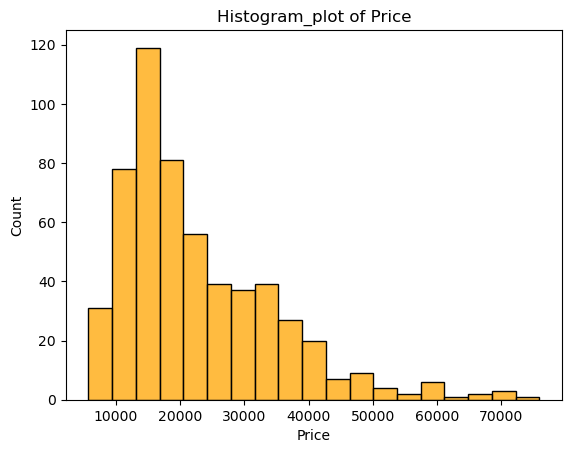

In [112]:
sns.histplot(df['Price'],color='Orange')
plt.title('Histogram_plot of Price')
plt.show()

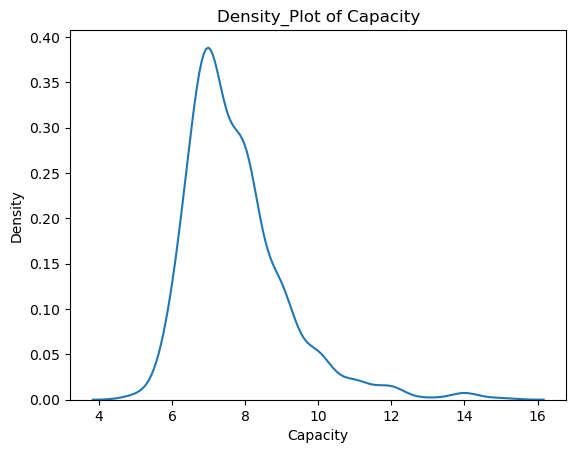

In [113]:
sns.kdeplot(df['Capacity'])
plt.title('Density_Plot of Capacity')
plt.show()

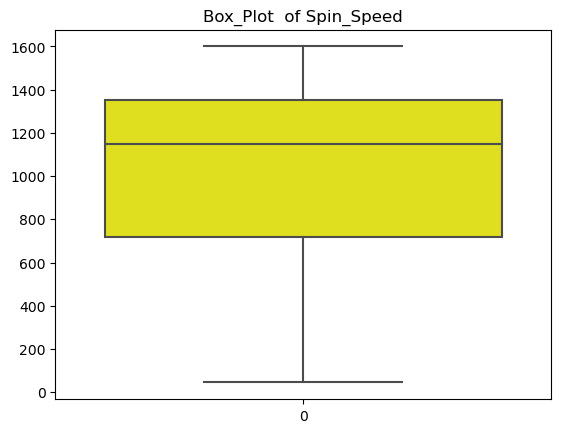

In [114]:
sns.boxplot(df['Spin_Speed'],color = 'yellow')
plt.title('Box_Plot  of Spin_Speed')
plt.show()

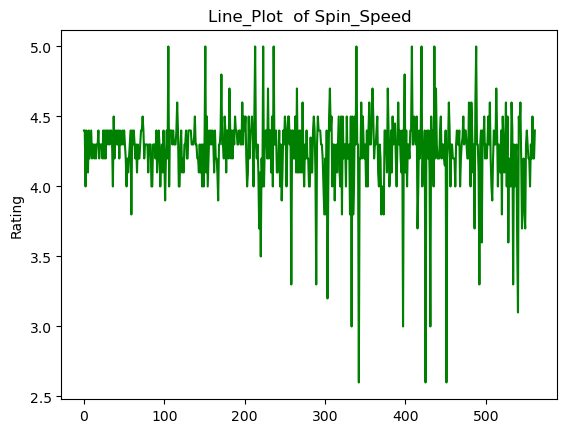

In [115]:
sns.lineplot(df['Rating'],color = 'green')
plt.title('Line_Plot  of Spin_Speed')
plt.show()

## Catagorical data

In [116]:
df.head()

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,1400.0,"Black, Grey",2.0,7690.0,4.0
3,LG,Semi Automatic,Top Load,7.0,5.0,1350.0,Silver,2.0,11490.0,4.4
4,Haier,Fully Automatic,Top Load,6.5,5.0,800.0,"Brown, Grey",2.0,12490.0,4.3


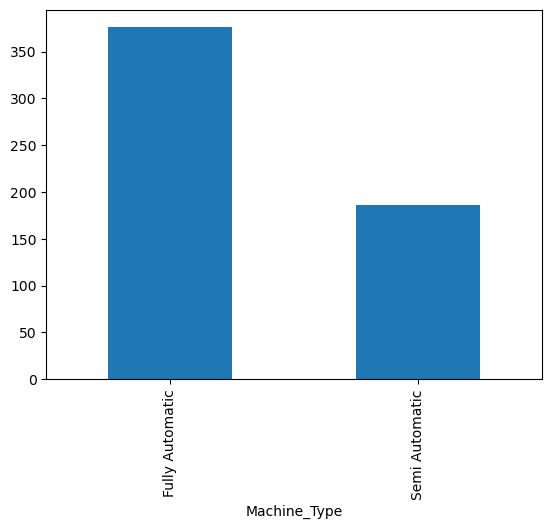

In [117]:
df['Machine_Type'].value_counts().plot(kind = 'bar')   # barplot
plt.show()

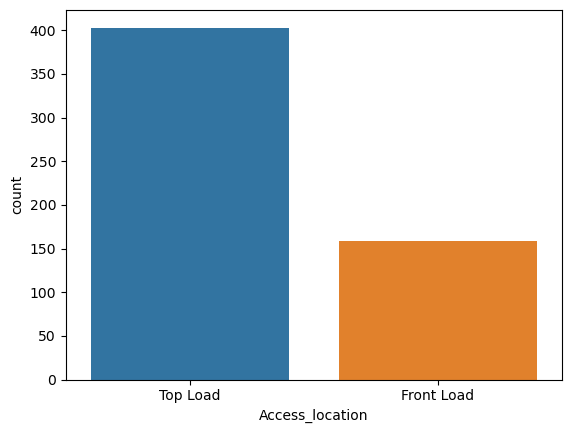

In [118]:
sns.countplot(x="Access_location", data=df)     # count plot
plt.show()

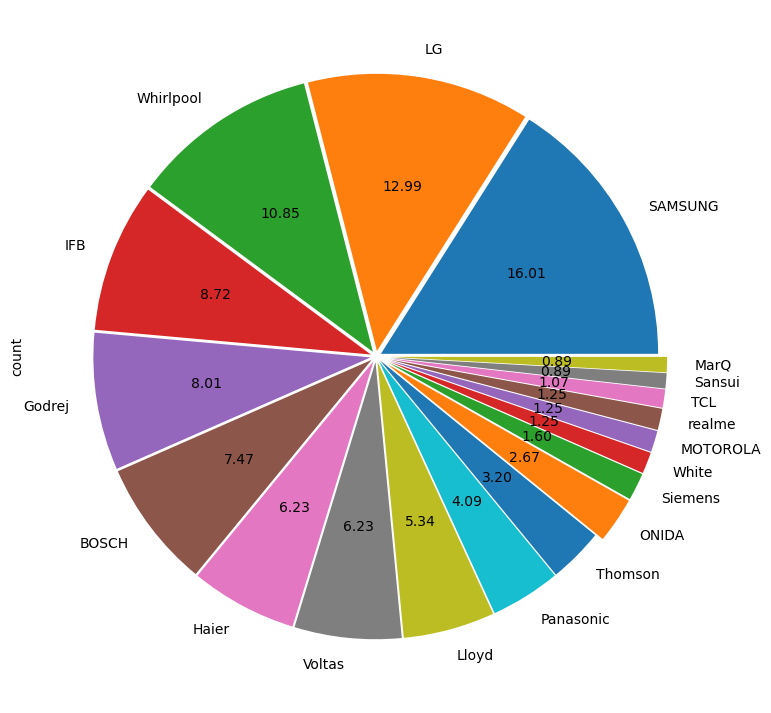

In [119]:
val = [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,]     # pie plot
plt.figure(figsize=(9,9))
df['Brand_Name'].value_counts().plot(kind = 'pie',autopct= '%.2f',explode = val)
plt.show()

# *Bivariate Analysis*

## continous vs continous

In [120]:
df.head(3)

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4
2,Thomson,Semi Automatic,Top Load,7.5,5.0,1400.0,"Black, Grey",2.0,7690.0,4.0


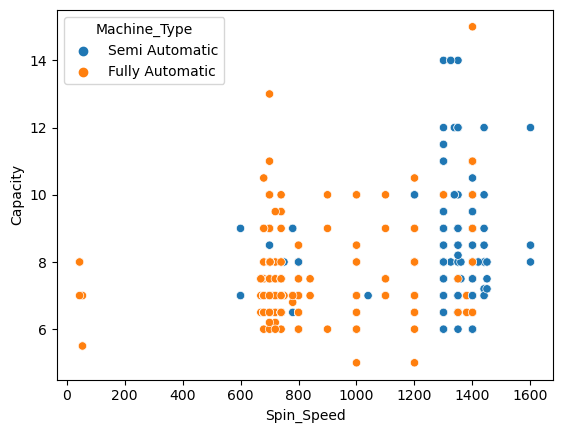

In [121]:
sns.scatterplot(data = df,x = 'Spin_Speed',y = "Capacity",hue = "Machine_Type")
plt.show()

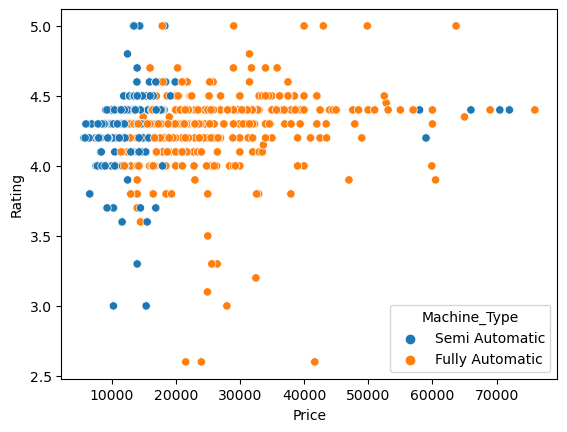

In [122]:
sns.scatterplot(data = df,x = 'Price',y = "Rating",hue = "Machine_Type")
plt.show()

## continous vs categorical

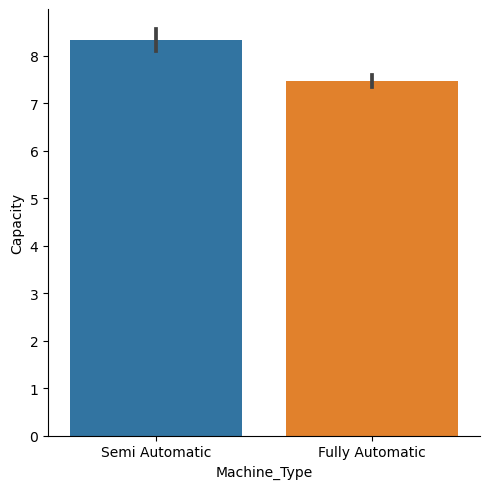

In [123]:
sns.catplot(data = df , x = 'Machine_Type', y = 'Capacity',kind = 'bar')

### Stacked bar chart     how to do?

### Categorical vs catagorical

In [124]:
df.head(2)

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,11990.0,4.4
1,SAMSUNG,Semi Automatic,Top Load,9.5,5.0,1300.0,"Black, Grey",2.0,15990.0,4.4


In [125]:
pd.crosstab(df['Brand_Name'],df['Machine_Type'])     # cross tab

Machine_Type,Fully Automatic,Semi Automatic
Brand_Name,,
BOSCH,40,2
Godrej,27,18
Haier,25,10
IFB,49,0
LG,60,13
Lloyd,14,16
MOTOROLA,6,1
MarQ,1,4
ONIDA,5,10


# Multivariate Analysis

In [126]:
df.corr(numeric_only = True)

,Capacity,Energy_star,Spin_Speed,Warranty,Price,Rating
Capacity,1.000000,-0.016680,0.303390,-0.122864,0.069774,-0.002111
Energy_star,-0.016680,1.000000,0.024293,0.084490,0.116326,0.020797
Spin_Speed,0.303390,0.024293,1.000000,-0.060549,0.023060,0.128929
Warranty,-0.122864,0.084490,-0.060549,1.000000,0.157956,-0.009037
Price,0.069774,0.116326,0.023060,0.157956,1.000000,0.154144
Rating,-0.002111,0.020797,0.128929,-0.009037,0.154144,1.000000


<Axes: >

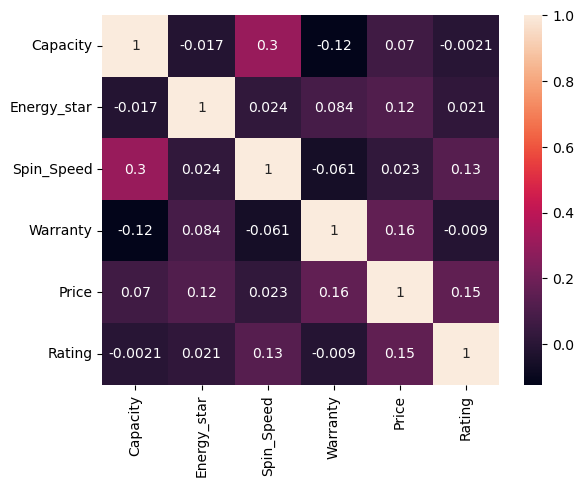

In [127]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

# `Data analysis or exctrated the best data with good features`

In [128]:
df1 = df[(df['Rating']>4.5) & (df['Price'] < 20000)].reset_index()
df1.drop('index',axis = 1, inplace = True)
df1

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
0,Voltas,Semi Automatic,Top Load,8.5,5.0,1300.0,"Grey, White",2.0,13390.0,5.0
1,LG,Semi Automatic,Top Load,11.5,5.0,1300.0,Black,2.0,19909.0,4.6
2,SAMSUNG,Semi Automatic,Top Load,11.5,5.0,1300.0,Red,2.0,18299.0,5.0
3,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Grey, Red",2.0,12480.0,4.8
4,Haier,Semi Automatic,Top Load,10.0,5.0,1300.0,"White, Black",2.0,15990.0,4.7
5,Panasonic,Semi Automatic,Top Load,12.0,5.0,1337.5,Multicolor,1.0,18430.0,4.6
6,SAMSUNG,Semi Automatic,Top Load,7.5,5.0,1300.0,"Blue, Grey",2.0,14390.0,5.0
7,Lloyd,Semi Automatic,Top Load,11.0,5.0,1300.0,Grey,2.0,15900.0,4.6
8,Lloyd,Semi Automatic,Top Load,8.5,5.0,1300.0,Blue,2.0,13979.0,4.7
9,Lloyd,Semi Automatic,Top Load,7.5,5.0,1300.0,Maroon,2.0,13490.0,5.0


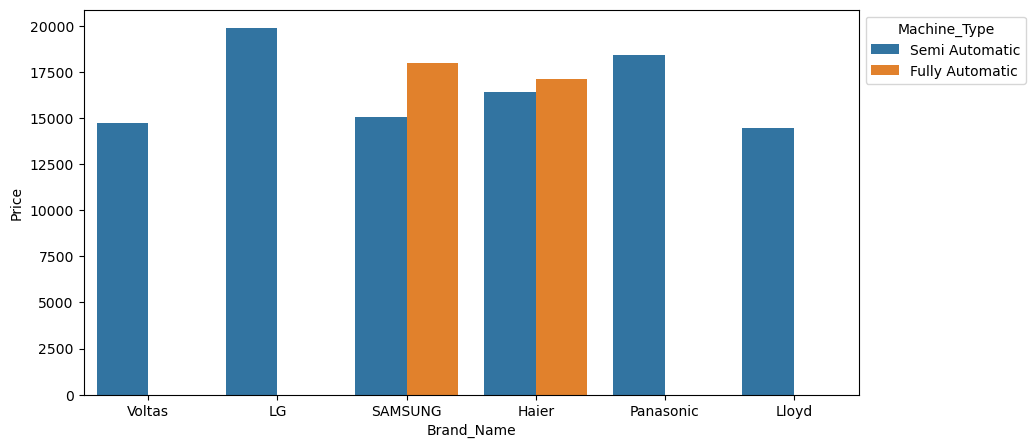

In [129]:
plt.figure(figsize = (10,5))
ax = sns.barplot(df1, x = 'Brand_Name', y = 'Price', hue='Machine_Type', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

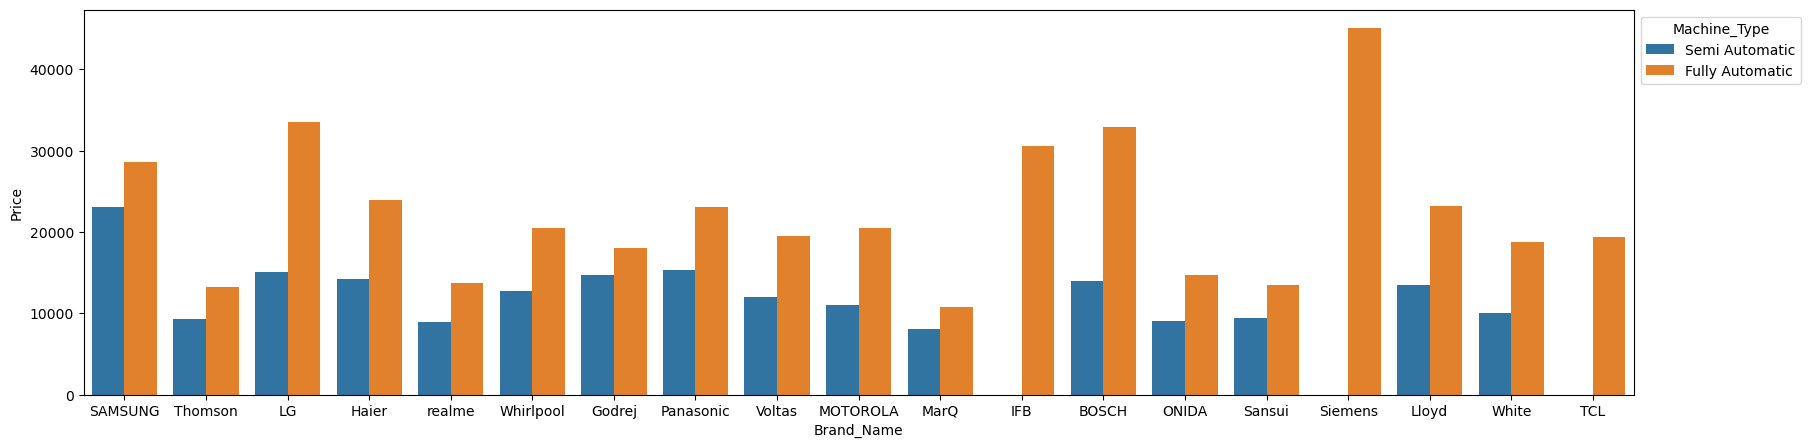

In [136]:
plt.figure(figsize = (20,5))
ax = sns.barplot(df, x = 'Brand_Name', y = 'Price', hue='Machine_Type', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

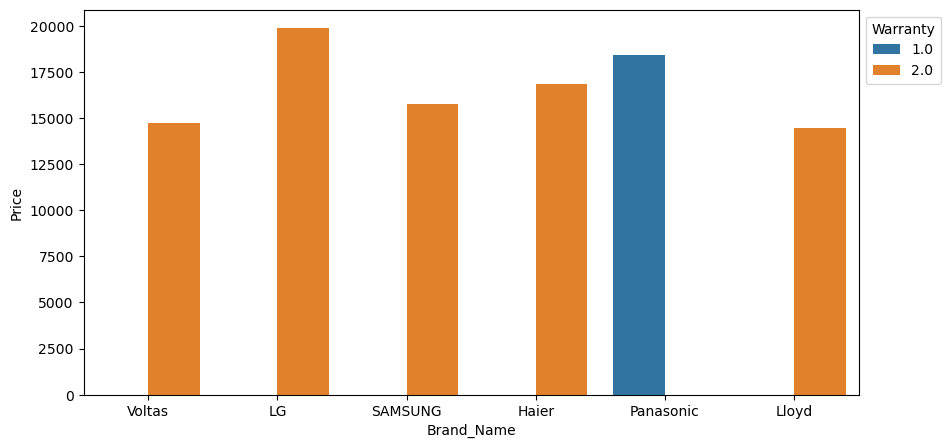

In [134]:
plt.figure(figsize = (10,5))
ax = sns.barplot(df1, x = 'Brand_Name', y = 'Price', hue='Warranty', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

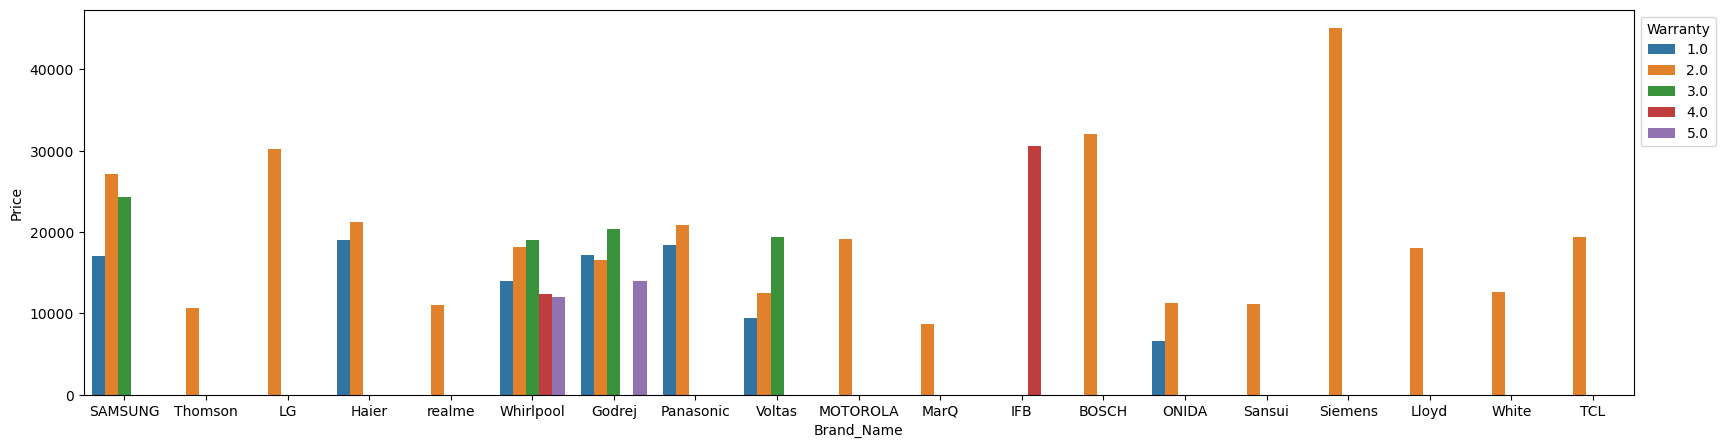

In [138]:
plt.figure(figsize = (20,5))
ax = sns.barplot(df, x = 'Brand_Name', y = 'Price', hue='Warranty', errorbar=None)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

In [131]:
df[df['Warranty'] == 3.0 ]

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
59,Voltas,Fully Automatic,Front Load,8.0,5.0,1200.0,"Blue, White",3.0,24990.0,3.80
133,SAMSUNG,Fully Automatic,Top Load,7.0,5.0,700.0,Grey,3.0,21800.0,4.40
211,SAMSUNG,Fully Automatic,Top Load,9.0,5.0,700.0,Black,3.0,25490.0,4.00
224,SAMSUNG,Fully Automatic,Top Load,7.0,5.0,700.0,Silver,3.0,18472.0,4.00
235,Voltas,Fully Automatic,Front Load,6.5,5.0,1000.0,Grey,3.0,15929.0,4.00
239,SAMSUNG,Fully Automatic,Top Load,10.0,5.0,700.0,Grey,3.0,24999.0,4.40
282,Voltas,Fully Automatic,Top Load,6.0,5.0,700.0,Grey,3.0,14928.0,4.35
297,SAMSUNG,Fully Automatic,Top Load,8.0,5.0,700.0,Grey,3.0,21900.0,4.20
322,SAMSUNG,Fully Automatic,Front Load,7.0,5.0,1200.0,White,3.0,32990.0,4.50
337,Godrej,Fully Automatic,Top Load,7.5,5.0,670.0,Grey,3.0,20379.0,4.50


In [132]:
df[df['Warranty'] == 4.0 ]

,Brand_Name,Machine_Type,Access_location,Capacity,Energy_star,Spin_Speed,Color,Warranty,Price,Rating
6,Whirlpool,Semi Automatic,Top Load,7.0,5.0,1400.0,Grey,4.0,9990.0,4.4
18,Whirlpool,Semi Automatic,Top Load,8.5,5.0,1400.0,Grey,4.0,13240.0,4.4
24,Whirlpool,Semi Automatic,Top Load,8.0,5.0,1400.0,Grey,4.0,12670.0,4.4
40,IFB,Fully Automatic,Front Load,7.0,5.0,720.0,Silver,4.0,16990.0,4.3
45,Whirlpool,Semi Automatic,Top Load,9.0,5.0,1400.0,Grey,4.0,14240.0,4.4
51,IFB,Fully Automatic,Front Load,7.0,5.0,1000.0,Silver,4.0,28990.0,4.3
57,IFB,Fully Automatic,Front Load,8.0,5.0,1200.0,Silver,4.0,30990.0,4.3
61,IFB,Fully Automatic,Front Load,9.0,5.0,1400.0,Silver,4.0,36990.0,4.3
76,Whirlpool,Semi Automatic,Top Load,6.5,5.0,1400.0,Grey,4.0,9590.0,4.3
77,IFB,Fully Automatic,Front Load,8.0,5.0,1200.0,Silver,4.0,31490.0,4.3


<Axes: >

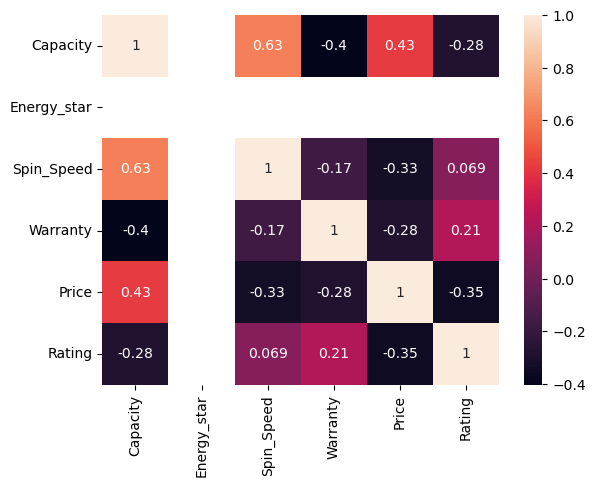

In [133]:
sns.heatmap(df1.corr(numeric_only = True),annot = True)